# Numerical Assignment 3
Debora Ramella ANR 760731

Yang Geng  ANR


Li Huang ANR 


## Question##
We want to explain how the traditional Cournot duopoly model can be extended to accomodate cost asymmetries using Pyhton.

## Motivation
The Cournot model has some features (optimization,equations solving) that make it ideal to illustrate how an economic problem can be solved with Python programming (even if we are aware that the question itself is not so original).

We are now going to import all the libraries we need...

In [22]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from sympy import init_printing
init_printing(use_latex=True)

## Assumptions
* Linear demand $P\left( Q \right) = \frac{1}{2} - Q$ where $Q = q_{1} + q_{2}$ and $q_{1} + q_{2} \leq \frac{1}{2}$
* Firms compete in quantities and simultaneously.
* There is no product differentiation. 
* Cost functions are homogeneous. $C(q_i)=c$ with $i=1,2$ and $c_1<c_2$ namely $c_1=0$ , $c_2=0.25$

## Model
Firms profit functions: $π_i=(0.5-q_i-q_j ) q_i-c_iq_i$ with $i=1,2$

Firstly, we are differentiating...

In [43]:
q1 = Symbol('q1')
q2 = Symbol('q2')

y=(0.5*q1-q1**2-q1*q2)
yprime = y.diff(q1)
yprime

In [44]:
q1 = Symbol('q1')
q2 = Symbol('q2')

y=(0.5*q2-q2**2-q1*q2-0.25*q2)
yprime = y.diff(q2)
yprime

To recap:

$(dπ_1)/(dq_1 )=-2q_1-q_2+0.5$


$(dπ_2)/(dq_2 )=-q_1-2q_2+0.25$

The FOCs are...

$-2q_1-q_2+0.5=0$

$-q_1-2q_2+0.25=0$

In [62]:

solve (-2*q1-q2+0.5, q1)

In [63]:
solve (-q1-2*q2+0.25, q2)

The system of the reaction curves:

$\left\{ \begin{matrix}
q_{1}\left( q_{2} \right) = - 0.5q_{2} + 0.25 \\
q_{2}\left( q_{1} \right) = - \frac{1}{2}q_{1}+0.125 \\
\end{matrix} \right.\ $

## A graphical representation

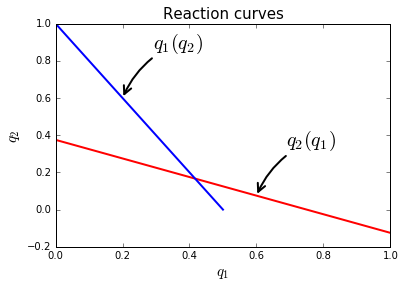

In [56]:
def reaction_function(q_other,c):
    return 0.5*(1-c-q_other)

c_1 = 0.0
c_2 = 0.25

range_q = arange(0.0,1.01,0.01)
range_reaction_1 = [reaction_function(q_2,c_1) for q_2 in range_q]
range_reaction_2 = [reaction_function(q_1,c_2) for q_1 in range_q]

plt.clf()
plt.plot(range_q, range_reaction_2,'-', color = 'r', linewidth = 2)
plt.plot(range_reaction_1, range_q,'-', color = 'b', linewidth = 2)
plt.title("Reaction curves",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.annotate('$q_2(q_1)$', xy=(0.6,reaction_function(0.6,c_2)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$q_1(q_2)$', xy=(reaction_function(0.6,c_1),0.6),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )




# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('reaction curves.png')

Mathematically we can see derive the equilibrium quantities...

In [61]:
solve([-0.5*q2+0.25-q1,-0.5*q1+0.125-q2 ], [q1,q2])

## Conclusions

$q_1^*=0.25$ 

$q_1^*=0.00$

$Q^*=0.25$

$P^*=0.25$

To conclude, only one firm will be active at equilibrium and will make $π_1=〖0.25〗^2$.